In [132]:
import pandas as pd
import os
import scipy.io as sio
import numpy as np
from tqdm import tnrange,tqdm_notebook

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [133]:
def concatDataLabel(path):
    mats = []
    index = 0 
    fileNames = np.arange(1000, 6000, 1000).tolist()
    for file in os.listdir(path):
        mats.append(sio.loadmat(path+"labels_"+ str(fileNames[index]) +".mat"))
        index = index + 1
    mats = np.array(mats) 
    myArray = []
    for i in range(0,5):
        for j in range(0,1000):
            myArray.append(mats[i]['data'][0][j])
    return(myArray)

In [134]:
def concatDataTraces(path):
    mats = []
    index = 0 
    fileNames = np.arange(1000, 6000, 1000).tolist()
    for file in os.listdir(path):
        mats.append(sio.loadmat(path+"traces_"+ str(fileNames[index]) +".mat"))
        index = index + 1
    mats = np.array(mats)
    myArray = []
    
    for i in range(0,5):
        for j in range(0,1000):
            myArray.append(mats[i]['data'][j])
    return(myArray)

In [135]:
def avgData(data):
    avgArray = []
    start = 0 
    end = 9
    for i in range(0,len(data),10):
        avgArray.append(data[start:end].mean())
        start = start + 10
        end = end + 10
    return(pd.DataFrame(avgArray))

In [136]:
def conversionProcess(i):
    
    fixedDir = './SBOX_traces2019-11-10_19_51_35/' 
    newDir = fixedDir + 'label/'
    newDir2 = fixedDir + 'traces/'
    for j in tnrange(0,12):
        df_label = pd.DataFrame(concatDataLabel(fixedDir +  "/spot_" + str(i) + "_" + str(j)+ '/label/'))
        df_avg_label = avgData(df_label).copy()
        df_avg_label.to_csv(newDir + "label_" + str(i) + "_" + str(j) + ".csv",index=False)
        df_traces = pd.DataFrame(concatDataTraces(fixedDir + "/spot_" + str(i) + "_" + str(j)+ '/traces/'))
        df_sliced_traces = df_traces.transpose()[0:10000].copy().reset_index(drop=True).transpose()
        df_avg_traces = avgData(df_sliced_traces)
        df_avg_traces.to_csv(newDir2 + "trace_sliced_" + str(i) + "_" + str(j) + ".csv",index=False)

In [137]:
def conversionCore(i,j):
    fixedDir = './SBOX_traces2019-11-10_19_51_35/' 
    newDir = fixedDir + 'label/'
    newDir2 = fixedDir + 'traces/'

    df_label = pd.DataFrame(concatDataLabel(fixedDir +  "/spot_" + str(i) + "_" + str(j)+ '/label/'))
    df_avg_label = avgData(df_label).copy()
    df_avg_label.to_csv(newDir + "label_" + str(i) + "_" + str(j) + ".csv",index=False)
    df_traces = pd.DataFrame(concatDataTraces(fixedDir + "/spot_" + str(i) + "_" + str(j)+ '/traces/'))
    df_sliced_traces = df_traces.transpose()[0:10000].copy().reset_index(drop=True).transpose()
    df_avg_traces = avgData(df_sliced_traces)
    df_avg_traces.to_csv(newDir2 + "trace_sliced_" + str(i) + "_" + str(j) + ".csv",index=False)

In [ ]:
fixedDir = './SBOX_traces2019-11-10_19_51_35/' 
newDir = fixedDir + 'label/'
newDir2 = fixedDir + 'traces/'
for i in tnrange(9,12):
    for j in tnrange(12,20):
        df_label = pd.DataFrame(concatDataLabel(fixedDir +  "/spot_" + str(i) + "_" + str(j)+ '/label/'))
        df_avg_label = avgData(df_label).copy()
        df_avg_label.to_csv(newDir + "label_" + str(i) + "_" + str(j) + ".csv",index=False)
        df_traces = pd.DataFrame(concatDataTraces(fixedDir + "/spot_" + str(i) + "_" + str(j)+ '/traces/'))
        df_sliced_traces = df_traces.transpose()[0:10000].copy().reset_index(drop=True).transpose()
        df_avg_traces = avgData(df_sliced_traces)
        df_avg_traces.to_csv(newDir2 + "trace_sliced_" + str(i) + "_" + str(j) + ".csv",index=False)

In [148]:
import multiprocessing as mp
os.system("taskset -p 0xff %d" % os.getpid())


for i in tnrange(10,12):
    pool = mp.Pool(mp.cpu_count())
    results = [pool.apply(conversionCore, args=[i,j]) for j in tnrange(0,20)]
    pool.close() 

In [123]:
fixedDir = './SBOX_traces2019-11-10_19_51_35/' 
newDir = fixedDir + 'label/'
newDir2 = fixedDir + 'traces/'

df_traces = pd.DataFrame(concatDataTraces(fixedDir + '/spot_0_0/traces/'))

[[110  95 134 ... 167 156 142]
 [ 80  84 117 ... 132 148 122]
 [ 96 100 103 ... 151 167 137]
 ...
 [127 139  70 ... 110 144 123]
 [ 98  87 108 ... 166 149 150]
 [ 99  81  91 ... 105 136 150]]


In [124]:
len(df_traces)

5000

In [125]:
myData = avgData(df_traces)

In [126]:
len(myData)

500

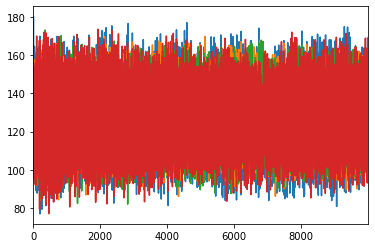

In [127]:
myData.transpose()[0].plot()
myData.transpose()[1].plot()
myData.transpose()[2].plot()
myData.transpose()[3].plot()